In [ ]:
import pandas as pd
import string
from unidecode import unidecode


### a) Ler o dataset fakeTelegram.BR_2022.csv

In [21]:
df = pd.read_csv('../raw_data/fakeTelegram.BR_2022.csv')

### b) Identificar e listar as posições (células) contendo valores faltantes.

In [5]:
missing_positions = df.isna()
missing_cells = missing_positions.stack()
missing_locations = missing_cells[missing_cells]

In [ ]:
list(missing_locations.index) # Linha Coluna

[(0, 'media'),
 (0, 'media_type'),
 (0, 'media_url'),
 (0, 'score_misinformation'),
 (0, 'media_name'),
 (0, 'media_md5'),
 (1, 'id_member_anonymous'),
 (1, 'media'),
 (1, 'media_type'),
 (1, 'media_url'),
 (1, 'score_misinformation'),
 (1, 'media_name'),
 (1, 'media_md5'),
 (2, 'media'),
 (2, 'media_type'),
 (2, 'media_url'),
 (2, 'media_name'),
 (2, 'media_md5'),
 (3, 'media_url'),
 (3, 'score_misinformation'),
 (3, 'media_name'),
 (4, 'media_url'),
 (4, 'text_content_anonymous'),
 (4, 'score_sentiment'),
 (4, 'score_misinformation'),
 (4, 'media_name'),
 (5, 'id_member_anonymous'),
 (5, 'media'),
 (5, 'media_type'),
 (5, 'media_url'),
 (5, 'media_name'),
 (5, 'media_md5'),
 (6, 'media'),
 (6, 'media_type'),
 (6, 'media_url'),
 (6, 'media_name'),
 (6, 'media_md5'),
 (7, 'media_url'),
 (7, 'text_content_anonymous'),
 (7, 'score_sentiment'),
 (7, 'score_misinformation'),
 (7, 'media_name'),
 (8, 'media_url'),
 (8, 'text_content_anonymous'),
 (8, 'score_sentiment'),
 (8, 'score_misinfor

### c) Contar quantas linhas possuem valores faltantes.

In [12]:
df.shape

(557586, 19)

In [11]:
len(list(df.isna().sum(axis=1)))

557586

### d) Para cada coluna (feature), contar quantas linhas possuem valores faltantes.

In [14]:
df.isna().sum(axis=0)

date_message                   0
id_member_anonymous       323341
id_group_anonymous             0
media                     224981
media_type                224981
media_url                 400141
has_media                      0
has_media_url                  0
trava_zap                      0
text_content_anonymous    113385
dataset_info_id                0
date_system                    0
score_sentiment           113429
score_misinformation      390348
id_message                     0
message_type                   0
messenger                      0
media_name                528599
media_md5                 224981
dtype: int64

In [19]:
missing_positions = df.isna()
missing_cells = missing_positions.stack()
missing_locations = missing_cells[missing_cells].reset_index()
missing_locations.columns = ['linha', 'coluna', 'faltante?']
grouped = missing_locations.groupby('coluna')['linha'].apply(list).reset_index()

In [20]:
grouped

,coluna,linha
0,id_member_anonymous,"[1, 5, 11, 12, 14, 17, 21, 22, 24, 25, 26, 27,..."
1,media,"[0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17,..."
2,media_md5,"[0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17,..."
3,media_name,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,media_type,"[0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17,..."
5,media_url,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15..."
6,score_misinformation,"[0, 1, 3, 4, 7, 8, 11, 15, 18, 20, 23, 28, 34,..."
7,score_sentiment,"[4, 7, 8, 15, 20, 23, 28, 42, 45, 49, 50, 57, ..."
8,text_content_anonymous,"[4, 7, 8, 15, 20, 23, 28, 42, 45, 49, 50, 57, ..."


### e) Identificar e listar as linhas repetidas (duplicadas).

In [14]:
df[df.duplicated()]

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5


### f) Identificar e listar as posições (células) contendo valores que não pertencem ao domínio (tipo de dados) esperado.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557586 entries, 0 to 557585
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_message            557586 non-null  object 
 1   id_member_anonymous     234245 non-null  object 
 2   id_group_anonymous      557586 non-null  object 
 3   media                   332605 non-null  object 
 4   media_type              332605 non-null  object 
 5   media_url               157445 non-null  object 
 6   has_media               557586 non-null  bool   
 7   has_media_url           557586 non-null  bool   
 8   trava_zap               557586 non-null  bool   
 9   text_content_anonymous  444201 non-null  object 
 10  dataset_info_id         557586 non-null  int64  
 11  date_system             557586 non-null  object 
 12  score_sentiment         444157 non-null  float64
 13  score_misinformation    167238 non-null  float64
 14  id_message          

In [ ]:
violacoes = []
tipo_base_coluna = {}

for col in df.columns:
    tipo = df[col].dtype

    if tipo == 'object':
        primeiro_valido = df[col].dropna().iloc[0] if not df[col].dropna().empty else None
        tipo_base = type(primeiro_valido) if primeiro_valido is not None else str
        tipo_base_coluna[col] = tipo_base
    else:
        tipo_base_coluna[col] = tipo

for col in df.columns:
    tipo_esperado = tipo_base_coluna[col]

    for idx, valor in df[col].items():
        if pd.isnull(valor):
            continue

        if tipo_esperado == 'object' or tipo_esperado == str:
            if not isinstance(valor, str):
                violacoes.append((idx, col, valor, f'esperado: {tipo_esperado.__name__}'))

        elif tipo_esperado == 'int64':
            if not (isinstance(valor, int) and not isinstance(valor, bool)):
                violacoes.append((idx, col, valor, 'esperado: int'))

        elif tipo_esperado == 'float64':
            try:
                float(valor)
            except:
                violacoes.append((idx, col, valor, 'esperado: float'))

        elif tipo_esperado == 'bool':
            if not isinstance(valor, bool):
                violacoes.append((idx, col, valor, 'esperado: bool'))

        else:
            if not isinstance(valor, tipo_esperado):
                violacoes.append((idx, col, valor, f'esperado: {tipo_esperado.__name__}'))

In [30]:
df_violacoes = pd.DataFrame(violacoes, columns=['linha', 'coluna', 'valor_invalido', 'esperado'])

In [31]:
df_violacoes.head()

,linha,coluna,valor_invalido,esperado


### g) Crie uma coluna chamada “caracteres” contendo a quantidade de caracteres da coluna “text”.

In [33]:
df.columns

Index(['date_message', 'id_member_anonymous', 'id_group_anonymous', 'media',
       'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'text_content_anonymous', 'dataset_info_id', 'date_system',
       'score_sentiment', 'score_misinformation', 'id_message', 'message_type',
       'messenger', 'media_name', 'media_md5'],
      dtype='object')

In [ ]:
df['caracteres'] = df['text_content_anonymous'].astype(str).str.len()

In [90]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,caracteres
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN,110
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN,141
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN,350
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,3


### h) Crie uma coluna chamada “words” contendo a quantidade de palavras da coluna “text”.

In [91]:
df['words'] = df['text_content_anonymous'].astype(str).str.split().str.len()

In [39]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,date_system,score_sentiment,score_misinformation,id_message,message_type,messenger,media_name,media_md5,caracteres,words
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Texto,telegram,NaN,NaN,110,20
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Texto,telegram,NaN,NaN,141,23
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Texto,telegram,NaN,NaN,350,59
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,NaN,...,2022-10-05 06:28:29.316325,NaN,NaN,507185,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,3,1


### i) Crie uma coluna chamada “viral” contendo o valor 0 se o texto da mensagem (valor do campo “text”) não for encontrado em outras linhas e 1, caso contrário.
### j) Crie uma coluna chamada “sharings” contendo a quantidade de vezes que o texto armazenado no atributo “text” aparece no dataset.

In [15]:
def normalizar_texto(txt):
    if pd.isnull(txt):
        return ""
    txt = txt.lower()
    txt = unidecode(txt)  # remove acentos
    txt = txt.translate(str.maketrans('', '', string.punctuation))  # remove pontuação
    return txt.strip()

In [18]:
df['text_normalizado'] = df['text_content_anonymous'].apply(normalizar_texto)

# Calcular se é viral (aparece mais de uma vez)
df['viral'] = df['text_normalizado'].duplicated(keep=False).astype(int)

# Calcular frequência de cada mensagem normalizada
frequencias = df['text_normalizado'].value_counts()
df['sharings'] = df['text_normalizado'].map(frequencias)

# Remover coluna auxiliar
df.drop(columns=['text_normalizado'], inplace=True)


In [20]:
df[['text_content_anonymous', 'viral', 'sharings']].dropna().sort_values(by='sharings', ascending=False)

,text_content_anonymous,viral,sharings
493853,😒,1,115398
493857,😳,1,115398
493863,😳,1,115398
24497,🌩\n\n🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷😎,1,115398
536538,@,1,115398
...,...,...,...
296377,https://gazetabrasil.com.br/politica/2022/10/0...,0,1
296374,A Tecnologia está muito avançada. Mudam tudo. ...,0,1
296373,https://www.jornaldacidadeonline.com.br/notici...,0,1
296372,"Exatamente!\nUm fio, de expectativa.\n\nO outr...",0,1


### k) Crie uma coluna chamada “sentiment” contendo os valores: -1 para textos negativos, 0 para textos neutros e 1 para textos positivos.

In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [57]:
df['score_sentiment']

0         0.0000
1         0.0644
2        -0.3551
3         0.0000
4            NaN
           ...  
557581    0.1027
557582    0.0000
557583    0.0000
557584    0.0000
557585    0.0000
Name: score_sentiment, Length: 557586, dtype: float64

In [96]:
# Inicializa o analisador
analyzer = SentimentIntensityAnalyzer()

# Garante que há texto
df = df[df['text_content_anonymous'].notna()]

# Calcula o compound score com VADER
df['compound'] = df['text_content_anonymous'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Converte o compound em rótulos: -1, 0, 1
df['sentiment'] = df['compound'].apply(
    lambda x: -1 if x < -0.05 else (1 if x > 0.05 else 0)
)

df.drop(columns=['compound'], inplace=True)

In [97]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,id_message,message_type,messenger,media_name,media_md5,caracteres,words,viral,freq,sentiment
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,Então é Fato Renato o áudio que eu ouvi no wha...,...,16385,Texto,telegram,NaN,NaN,110,20,0,1,-1
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,"Saiu no YouTube do presidente a 8 horas atrás,...",...,16386,Texto,telegram,NaN,NaN,141,23,0,1,-1
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,"É isso, nossa parte já foi quase toda feita. N...",...,16366,Texto,telegram,NaN,NaN,350,59,0,1,-1
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA,...,19281,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,40,7,0,1,0
5,2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,Kķkkkkk to rindo até agora....Quem disse q ia ...,...,2735,Texto,telegram,NaN,NaN,133,25,0,1,1


In [98]:
# Selecionar apenas linhas válidas
df_comp = df[['score_sentiment', 'sentiment']].dropna().reset_index(drop=True)

# Discretizar score_sentiment
df_comp['score_sentiment_label'] = df_comp['score_sentiment'].apply(
    lambda x: -1 if x < 0.4 else (1 if x > 0.6 else 0)
)

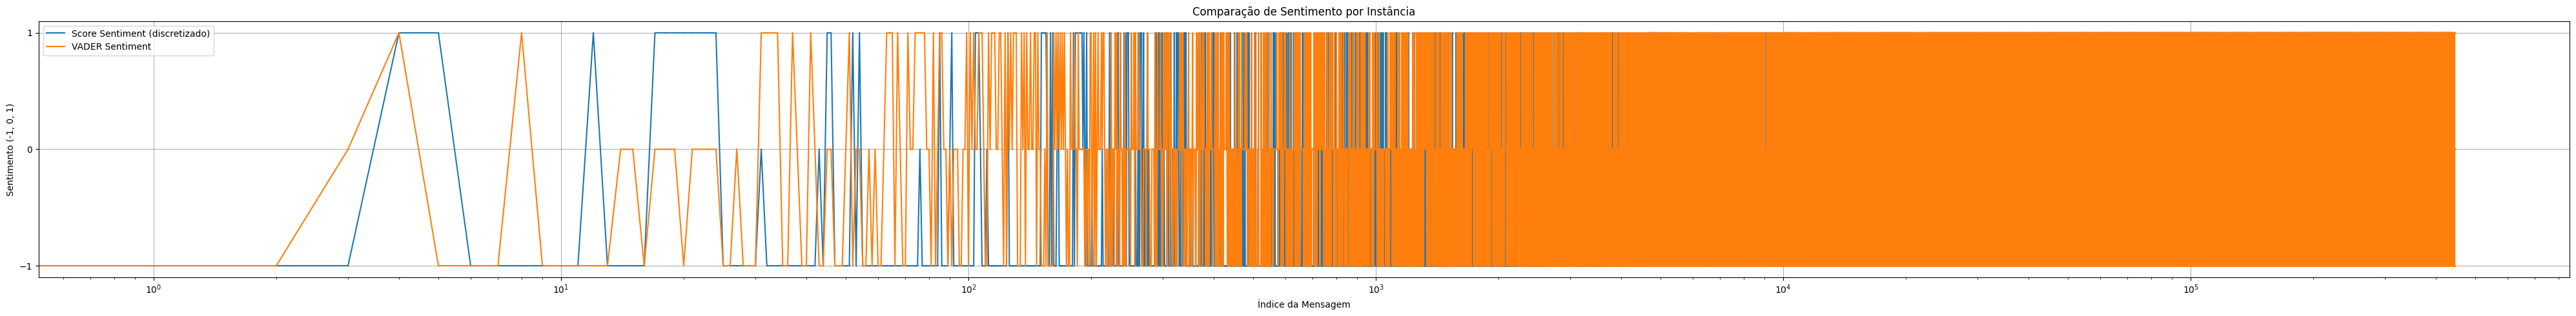

In [99]:
# Plotar gráfico de linhas para as instâncias
plt.figure(figsize=(40, 5))
plt.plot(df_comp.index, df_comp['score_sentiment_label'], label='Score Sentiment (discretizado)', linestyle='-', marker='o', markersize=0.5)
plt.plot(df_comp.index, df_comp['sentiment'], label='VADER Sentiment', linestyle='-', marker='s', markersize=0.5)
plt.title('Comparação de Sentimento por Instância')
plt.xscale('log')
plt.xlabel('Índice da Mensagem')
plt.ylabel('Sentimento (-1, 0, 1)')
plt.yticks([-1, 0, 1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
vader_counts = df_comp['sentiment'].value_counts().sort_index()
score_counts = df_comp['score_sentiment_label'].value_counts().sort_index()

df_plot = pd.DataFrame({
    'VADER': vader_counts,
    'Score Sentiment': score_counts
}).fillna(0)

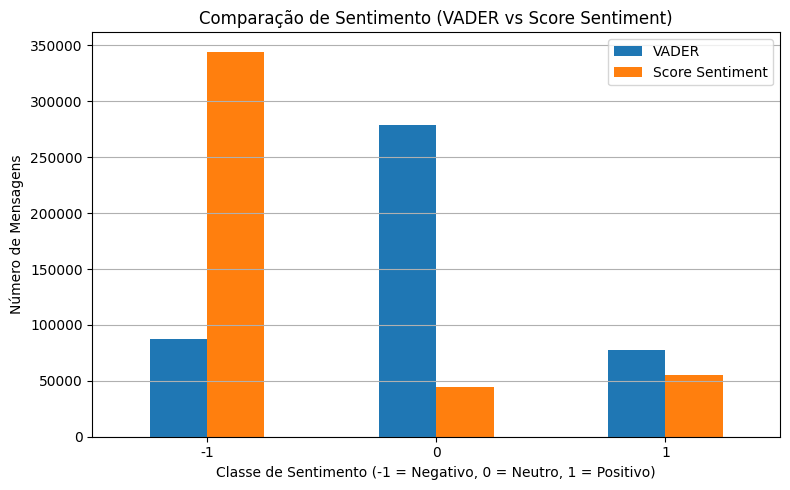

In [101]:
df_plot.plot(kind='bar', figsize=(8, 5))
plt.title('Comparação de Sentimento (VADER vs Score Sentiment)')
plt.xlabel('Classe de Sentimento (-1 = Negativo, 0 = Neutro, 1 = Positivo)')
plt.ylabel('Número de Mensagens')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### l) Eliminar as linhas cujo valor da coluna “text” contenham “trava-zaps”.

In [22]:
len(df.index)

557586

In [ ]:
# Lista de palavras/expressões a remover
termos_proibidos = ['trava-zaps', 'trav zap', 'zap-trava', 'trava zapado', 'zap travado']

# Combinar tudo em uma expressão regular
regex = '|'.join([rf'\b{t}\b' for t in termos_proibidos])

# Filtrar linhas que NÃO contêm os termos
df = df[~df['text_content_anonymous'].str.contains(regex, case=False, na=False, regex=True)]


In [25]:
len(df.index)


557586

In [26]:
df = df.loc[df['trava_zap']==False]

### m) Identificar inconsistências entre os atributos (features).

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557570 entries, 0 to 557585
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_message            557570 non-null  object 
 1   id_member_anonymous     234233 non-null  object 
 2   id_group_anonymous      557570 non-null  object 
 3   media                   332604 non-null  object 
 4   media_type              332604 non-null  object 
 5   media_url               157445 non-null  object 
 6   has_media               557570 non-null  bool   
 7   has_media_url           557570 non-null  bool   
 8   trava_zap               557570 non-null  bool   
 9   text_content_anonymous  444201 non-null  object 
 10  dataset_info_id         557570 non-null  int64  
 11  date_system             557570 non-null  object 
 12  score_sentiment         444141 non-null  float64
 13  score_misinformation    167224 non-null  float64
 14  id_message              5

In [116]:
inconsistencias = []

# 1. has_media é True mas media está vazia
inconsistencias.append(df[(df['has_media'] == True) & (df['media'].isna())])

# 2. has_media_url é True mas media_url está ausente
inconsistencias.append(df[(df['has_media_url'] == True) & (df['media_url'].isna())])

# 3. media_type == 'image' mas media_name ou media_md5 ausente
inconsistencias.append(df[(df['media_type'] == 'image') & (df['media_name'].isna() | df['media_md5'].isna())])

# 4. trava_zap é True mas 'text' não menciona trava zap
inconsistencias.append(df[(df['trava_zap'] == True) & (~df['text_content_anonymous'].astype(str).str.contains('trava', case=False, na=False))])

# 5. score_sentiment preenchido mas text está vazio
inconsistencias.append(df[df['score_sentiment'].notna() & (df['text_content_anonymous'].isna() | (df['text_content_anonymous'].str.strip() == ''))])

# 6. message_type é 'text' mas text está vazio
inconsistencias.append(df[(df['message_type'] == 'text') & (df['text_content_anonymous'].isna() | (df['text_content_anonymous'].str.strip() == ''))])


In [117]:
df_inconsistencias = pd.concat(inconsistencias).drop_duplicates().reset_index(drop=True)

print(f"Inconsistências encontradas: {len(df_inconsistencias)}")
display(df_inconsistencias.head())


Inconsistências encontradas: 0


,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,text_content_anonymous,...,id_message,message_type,messenger,media_name,media_md5,caracteres,words,viral,freq,sentiment
